In [2]:
from __future__ import print_function
import sdm as sdmlib
from sdm import utils
import matplotlib.pyplot as plt

In [3]:
bits = 1000
radius = 451 #utils.calculate_radius(bits)
sample = 1000000
scanner_type = sdmlib.SDM_SCANNER_OPENCL

H = sample
p1 = utils.calculate_probability(bits, radius)
h = p1*H
s = 10000
theta = s * h / H

print('H', H)
print('p1', p1)
print('h', h)
print('s', s)
print('theta', theta)

H 1000000
p1 0.001071850048924452
h 1071.850048924452
s 10000
theta 10.718500489244521


In [4]:
from math import factorial, log, exp
binom = lambda a, b: factorial(a) // factorial(b) // factorial(a - b)
a = sum(binom(bits-1, k) for k in range(0, radius+1))
b = sum(binom(bits, k) for k in range(0, radius+1))
#print(a)
#print(b)
p = 1.0*a/b
print('p', p)

p 0.552905498137


In [5]:
address_space = sdmlib.AddressSpace.init_random(bits, sample)
counter = sdmlib.Counter.init_zero(bits, sample)
sdm = sdmlib.SDM(address_space, counter, radius, scanner_type)

In [6]:
def write(n=1000, prefix=''):
    print('{}Writing {} random bitstrings... '.format(prefix, n), end='')
    for i in range(n):
        if i%20 == 0:
          print('!', end='')
        
        b1 = sdmlib.Bitstring.init_random(bits)
        #b2 = sdmlib.Bitstring.init_random(bits)
        sdm.write(b1, b1)
    print('')
    return n

In [7]:
write(s)

Writing 10000 random bitstrings... !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


10000

In [30]:
v1 = []
for i in range(sample):
    if (i+1)%10000 == 0:
        print(i+1, end=' ')
    bs1 = address_space.get_bitstring(i)
    bs2 = counter.to_bitstring(i)
    v1.append(bits - bs1.distance_to(bs2))
    
    #bs1 = address_space.get_bitstring(i)
    #cnt = 0
    #for j, x in enumerate(counter.get_counter(i)):
    #    b = bs1.get_bit(j)
    #    if b == 1 and x >= 0:
    #        cnt += 1
    #    elif b == 0 and x <= 0:
    #        cnt += 1
    #v1.append(cnt)

10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 160000 170000 180000 190000 200000 210000 220000 230000 240000 250000 260000 270000 280000 290000 300000 310000 320000 330000 340000 350000 360000 370000 380000 390000 400000 410000 420000 430000 440000 450000 460000 470000 480000 490000 500000 510000 520000 530000 540000 550000 560000 570000 580000 590000 600000 610000 620000 630000 640000 650000 660000 670000 680000 690000 700000 710000 720000 730000 740000 750000 760000 770000 780000 790000 800000 810000 820000 830000 840000 850000 860000 870000 880000 890000 900000 910000 920000 930000 940000 950000 960000 970000 980000 990000 1000000 

In [ ]:
[(i, x) for i, x in enumerate(v1) if x > 775]

In [ ]:
idx = 788
bs1 = address_space.get_bitstring(idx)
bs2 = counter.to_bitstring(idx)
bs_cnt = counter.get_counter(idx)
d = bs1.distance_to(bs2)
print('bits different', d)
print('bits equal', bits-d)
print('zeros', bs_cnt.count(0))
cnt = 0
for i, (a, b, c) in enumerate(zip(bs1.to_binary(), bs2.to_binary(), bs_cnt)):
    if c != 0:
        if a == b:
            cnt += 1
    #print('{:4d}'.format(i), a, b, '{:+4}'.format(c), '< {}'.format(cnt) if a != b else '')
    #if a != b:
    #    cnt += 1
print('!!', cnt)

634.08653 524.626192549
635.418641438 231.661791551


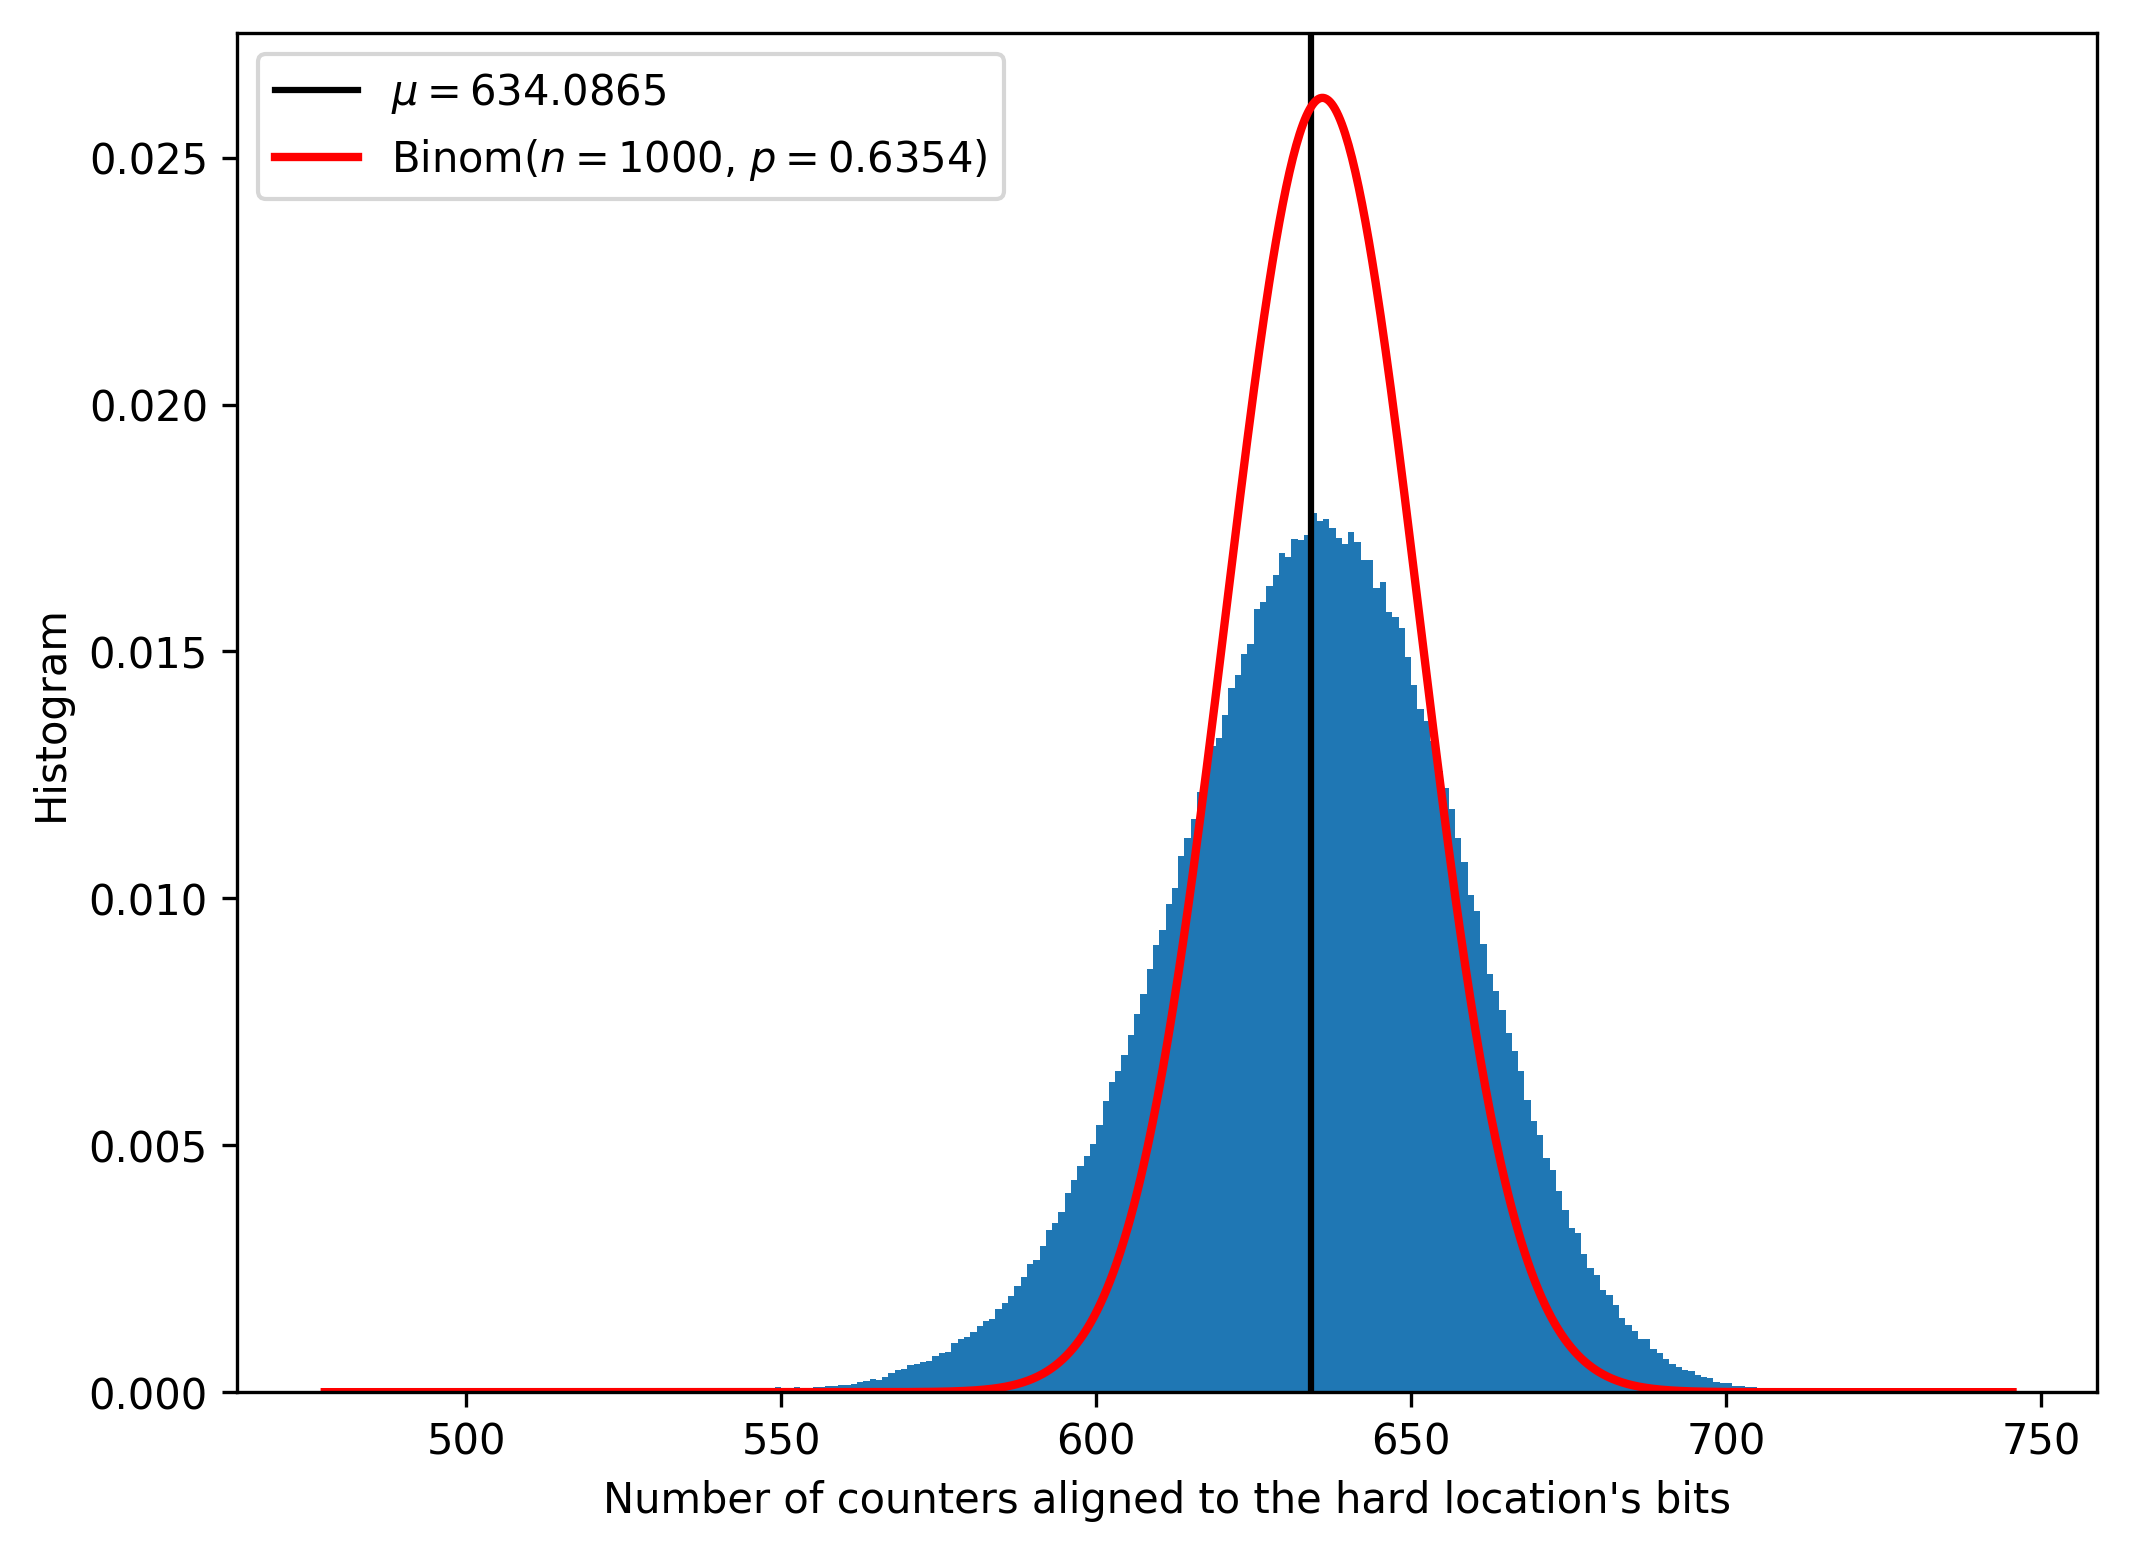

In [31]:
plt.figure(figsize=(8, 6), dpi=300)
bins = plt.hist(v1, bins=range(int(min(v1)), int(max(v1))+1), density=True);
mu = 1.0*sum(v1)/len(v1)
sigma = (sum((x - mu)**2 for x in v1)/len(v1))**0.5

plt.axvline(mu, color='k', label='$\mu = {:.4f}$'.format(mu))
plt.xlabel('Number of counters aligned to the hard location\'s bits')
plt.ylabel('Histogram')
#plt.xlim(500, 780)

print(mu, sigma**2)

tmp_p = 0.6354186414381007
mu = tmp_p*1000
sigma = tmp_p*(1-tmp_p)*1000
sigma = sigma**0.5
print(mu, sigma**2)

import numpy as np
import matplotlib.mlab as mlab
#from scipy.stats import binom
x_values = np.linspace(min(v1), max(v1)+1, 1000)
y_values = mlab.normpdf(x_values, mu, sigma)
#x_values = list(range(min(v1), max(v1)+1))
#y_values = binom.pmf(x_values, 1000, p)
plt.plot([x+0.5 for x in x_values], y_values, 'r', linewidth=2.0, label='Binom($n=1000$, $p={:.4f}$)'.format(tmp_p))

plt.legend();

In [ ]:
v2 = []
bs1 = sdmlib.Bitstring.init_zeros(bits)
for i in range(sample):
    bs2 = address_space.get_bitstring(i)
    v2.append(bs1.distance_to(bs2))

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(v2, bins='fd', density=True);

In [ ]:
v3 = []
for _ in range(100):
    bs1 = sdmlib.Bitstring.init_random(bits)
    selected = address_space.scan_opencl2(bs1, radius)
    for idx in selected:
        bs2 = address_space.get_bitstring(idx)
        v3.append(bs1.distance_to(bs2))

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(v3, bins=max(v3)-min(v3)+1, density=True);
1.0*sum(v3)/len(v3)

In [10]:
v4 = []
for i in range(1000):
    bs1 = address_space.get_bitstring(i)
    cnt1 = counter.get_counter(i)
    for j in range(bits):
        if bs1.get_bit(j) == 1:
            v4.append(cnt1[j])

1.13727415515
len 501063
zero 57451
0.36422136002224337


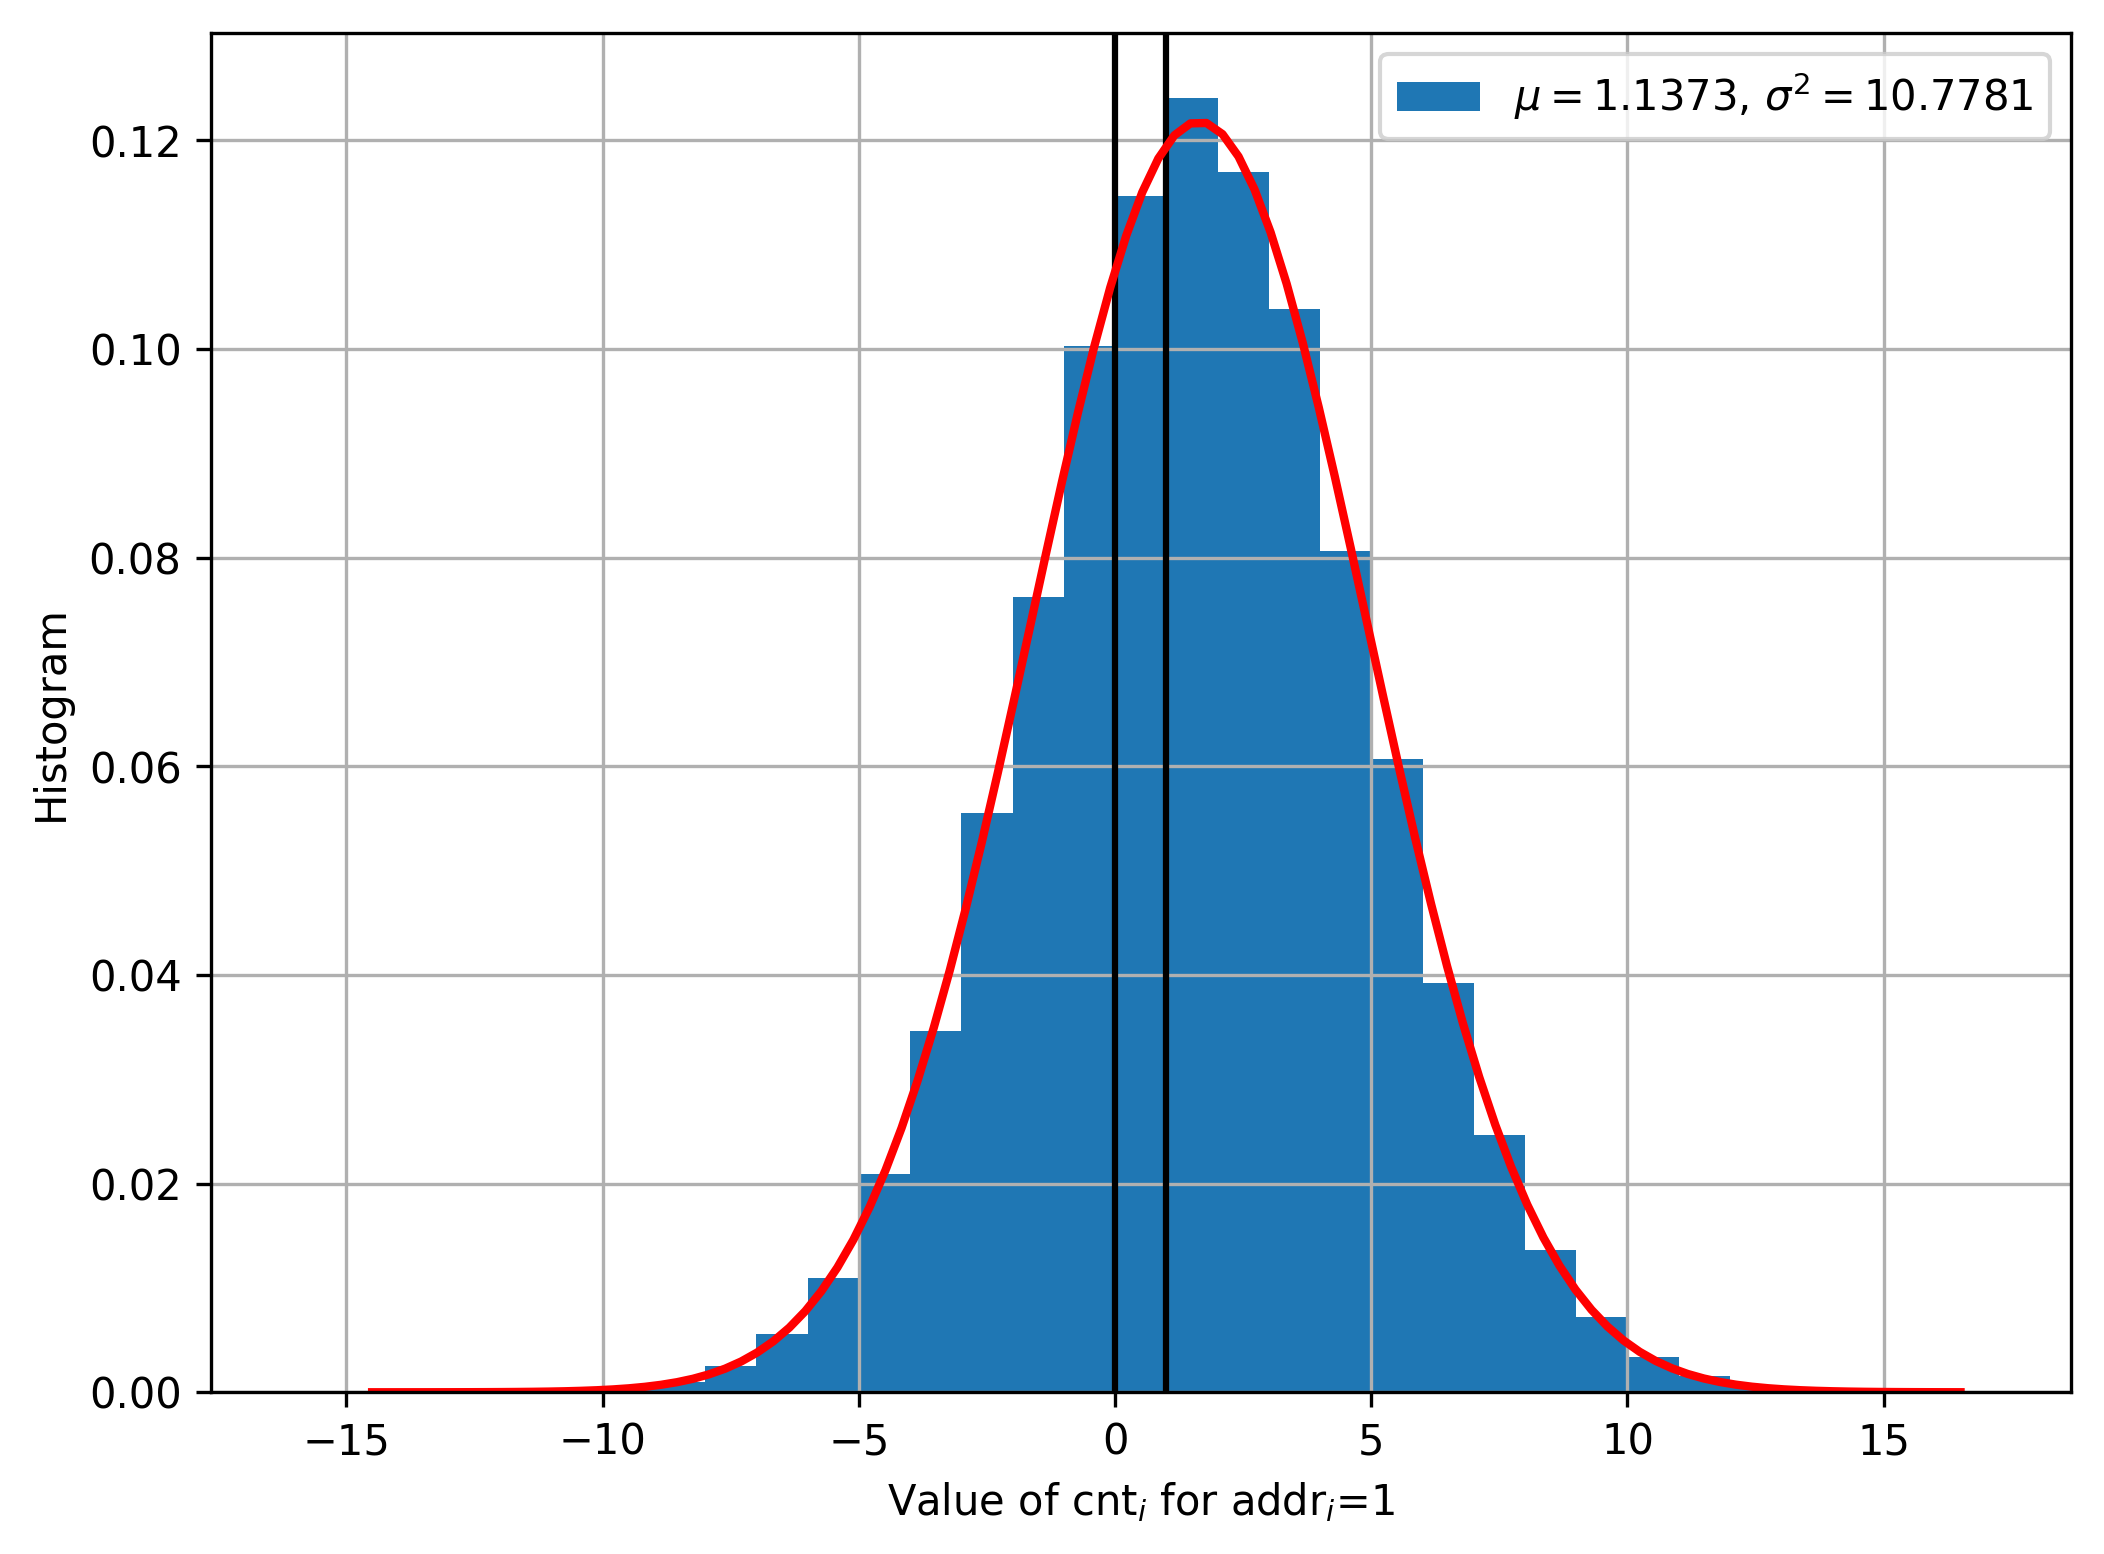

In [11]:
plt.figure(figsize=(8, 6), dpi=300)

mu = 1.0*sum(v4)/len(v4)
var = sum((x-mu)**2 for x in v4)/len(v4)
bins = plt.hist(v4, bins=range(min(v4), max(v4)+1), density=True, label='$\mu = {:.4f}$, $\sigma^2 = {:.4f}$'.format(mu, var));
print(1.0*sum(v4)/len(v4))

print('len', len(v4))
print('zero', v4.count(0))

plt.axvline(0, color='k')
plt.axvline(1, color='k')
plt.xlabel('Value of cnt$_i$ for addr$_i$=1')
plt.ylabel('Histogram')

mu1 = (2*p - 1) * theta
var1 = p * (1 - p) * theta + p*p * s*s/H * p1 * (1-p1)
var1 = 4 * var1

import numpy as np
import matplotlib.mlab as mlab
from scipy import stats
x_values = np.linspace(-15, 16, 100)
y_values = mlab.normpdf(x_values, mu, var1**0.5)
plt.plot([x+0.5 for x in x_values], y_values, 'r', linewidth=2.0);
print(stats.norm.cdf(0, mu, var1**0.5))

plt.grid()
plt.legend()

In [50]:
import random
v5_bs = []
v5 = []
v6 = []
v5_1 = []
v5_2 = []
k = 0
bit_value = 1
while k < 2000:
    bs1 = sdmlib.Bitstring.init_random(bits)
    bit_idx = random.randint(0, bits-1)
    v5_bs.append(bs1)
    if bs1.get_bit(bit_idx) != bit_value:
        continue
    if (k+1)%1000 == 0:
        print(k+1, end=' ')
    k += 1
    selected = address_space.scan_opencl2(bs1, radius)
    acc = 0
    cnt1 = 0
    v = []
    for idx in selected:
        bs2 = address_space.get_bitstring(idx)
        if bs2.get_bit(bit_idx) == bit_value:
            cnt1 += 1
            cnt = counter.counter[idx][bit_idx]
            v5_1.append(cnt)
            v.append(cnt)
            acc += cnt
    v5.append(acc)
    v5_2.append(v)
    v6.append(cnt1)

1000 2000 

1338780 1184709 2000
1.13004965776
1.1341352153317654 3.2755799144879765


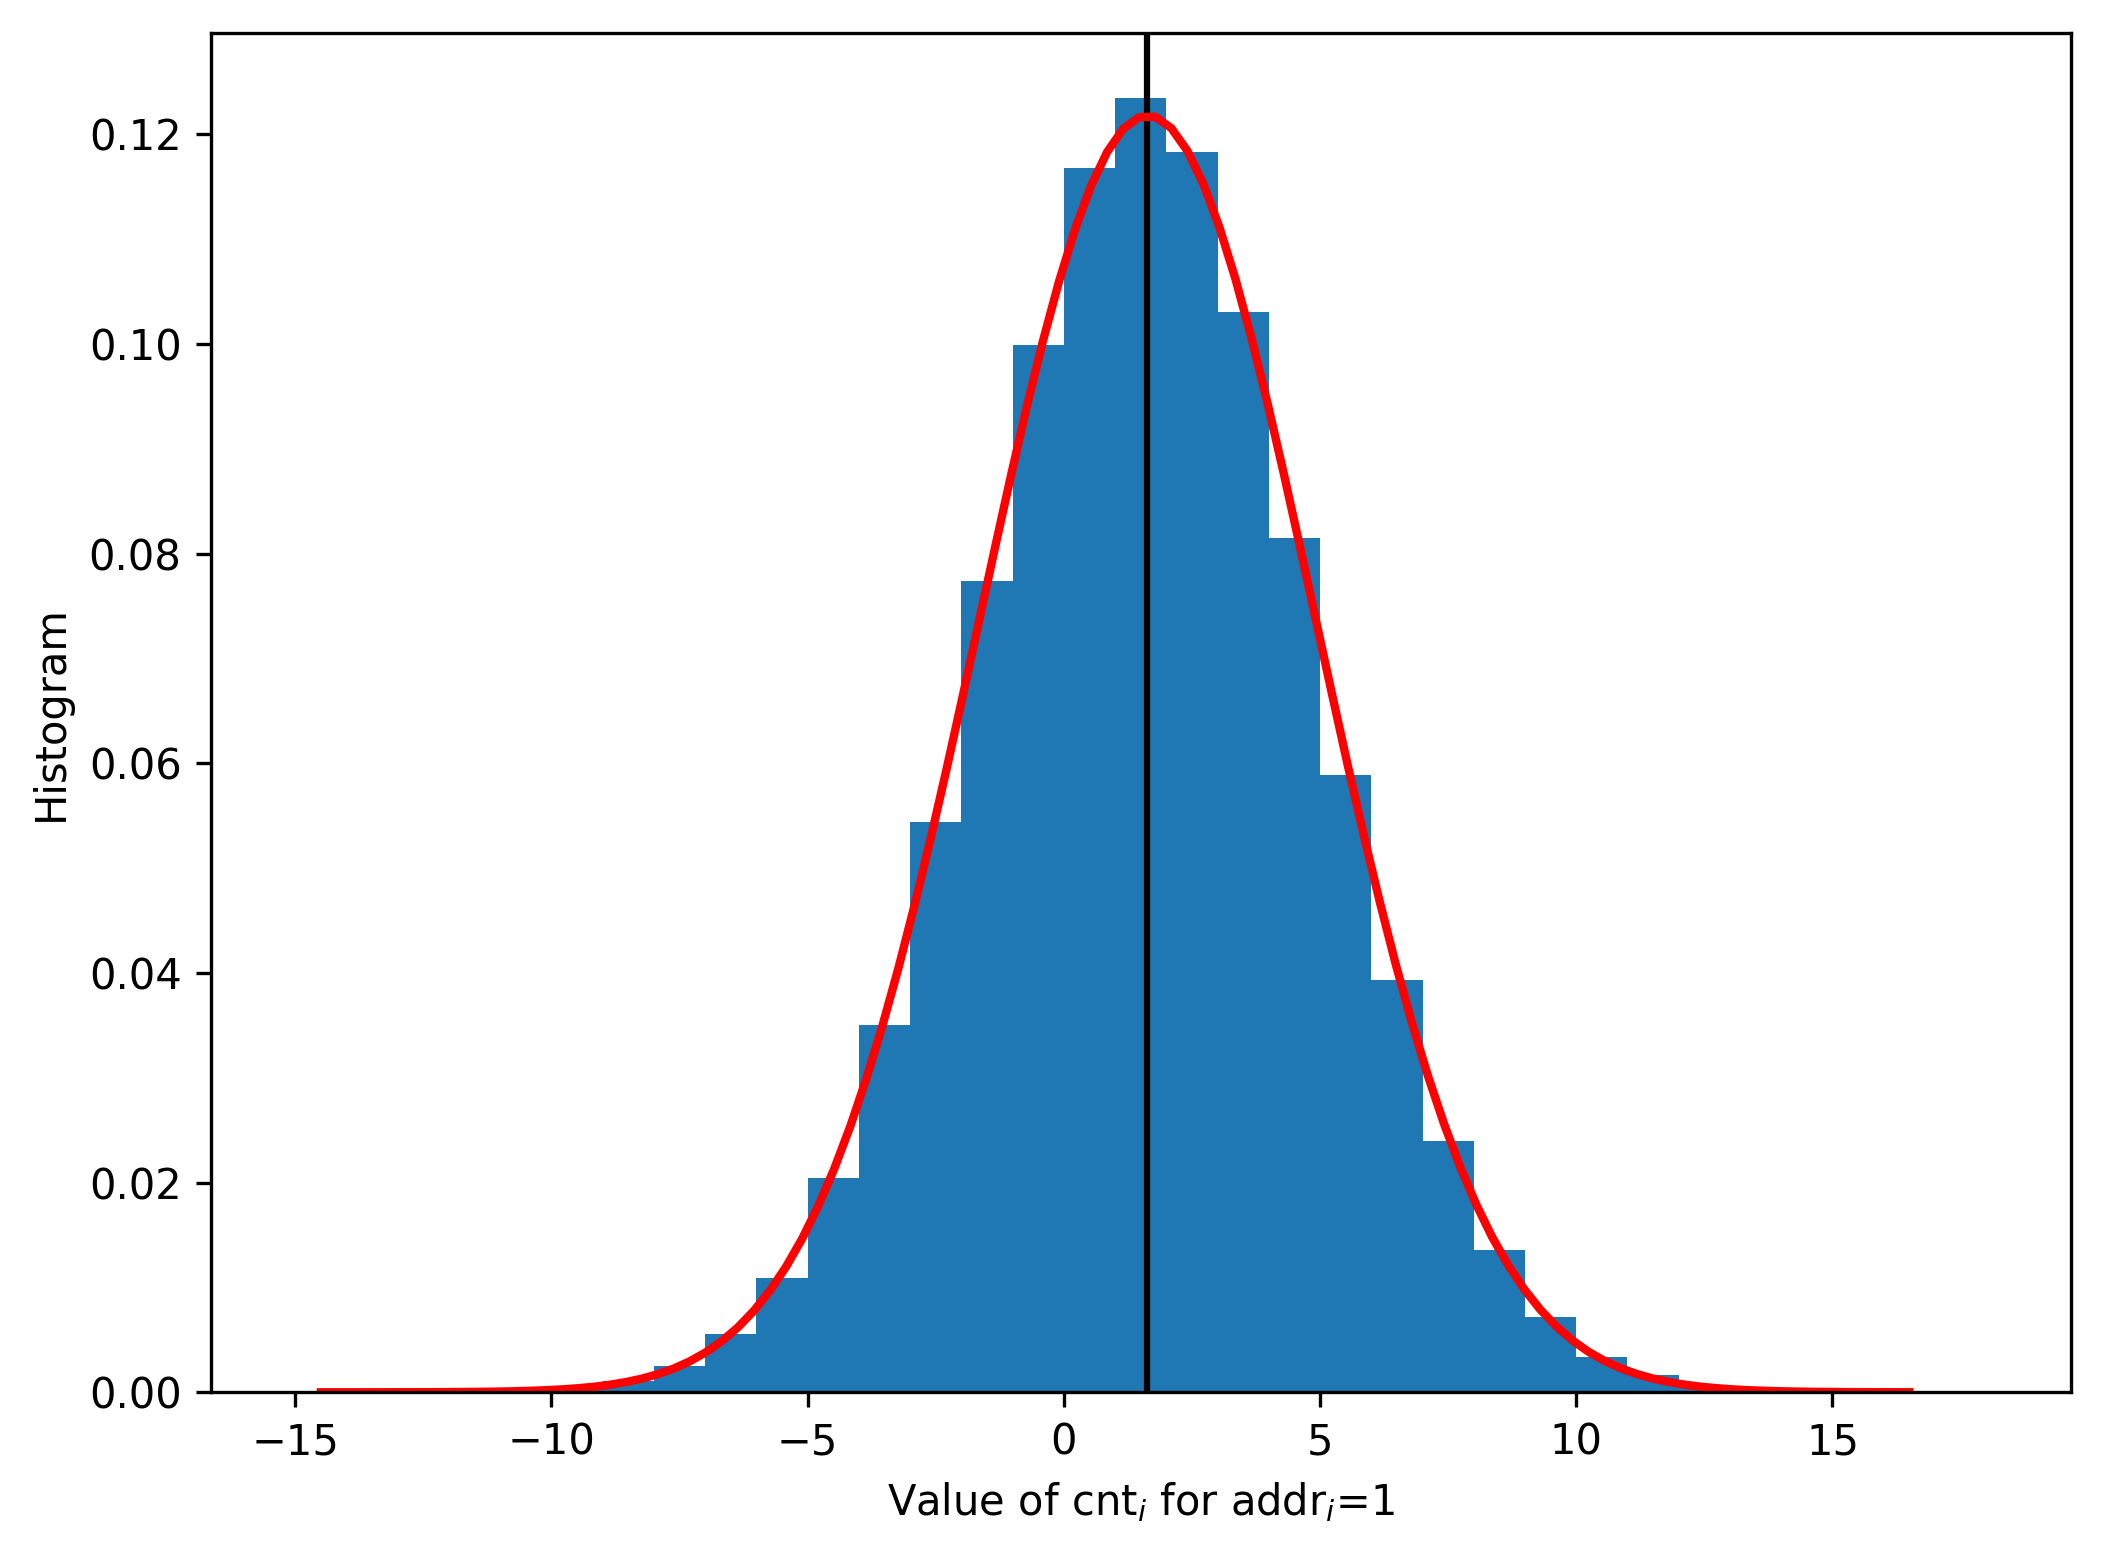

In [52]:
plt.figure(figsize=(8, 6), dpi=300)

plt.hist(v5_1, bins=range(min(v5_1), max(v5_1)+1), density=True, alpha=1);

plt.xlabel('Value of cnt$_i$ for addr$_i$=1')
plt.ylabel('Histogram')

print(sum(v5_1), len(v5_1), len(v5))
print(1.0*sum(v5_1)/len(v5_1))
print(mu1, var1**0.5)

plt.axvline(1.0*sum(v5_1)/len(v5_1)+0.5, color='k')

import numpy as np
import matplotlib.mlab as mlab
from scipy import stats
x_values = np.linspace(-15, 16, 100)
y_values = mlab.normpdf(x_values, mu1, var1**0.5)
plt.plot([x+0.5 for x in x_values], y_values, 'r', linewidth=2.0);

cnt 437
1.1341352153317654 10.72942377619706


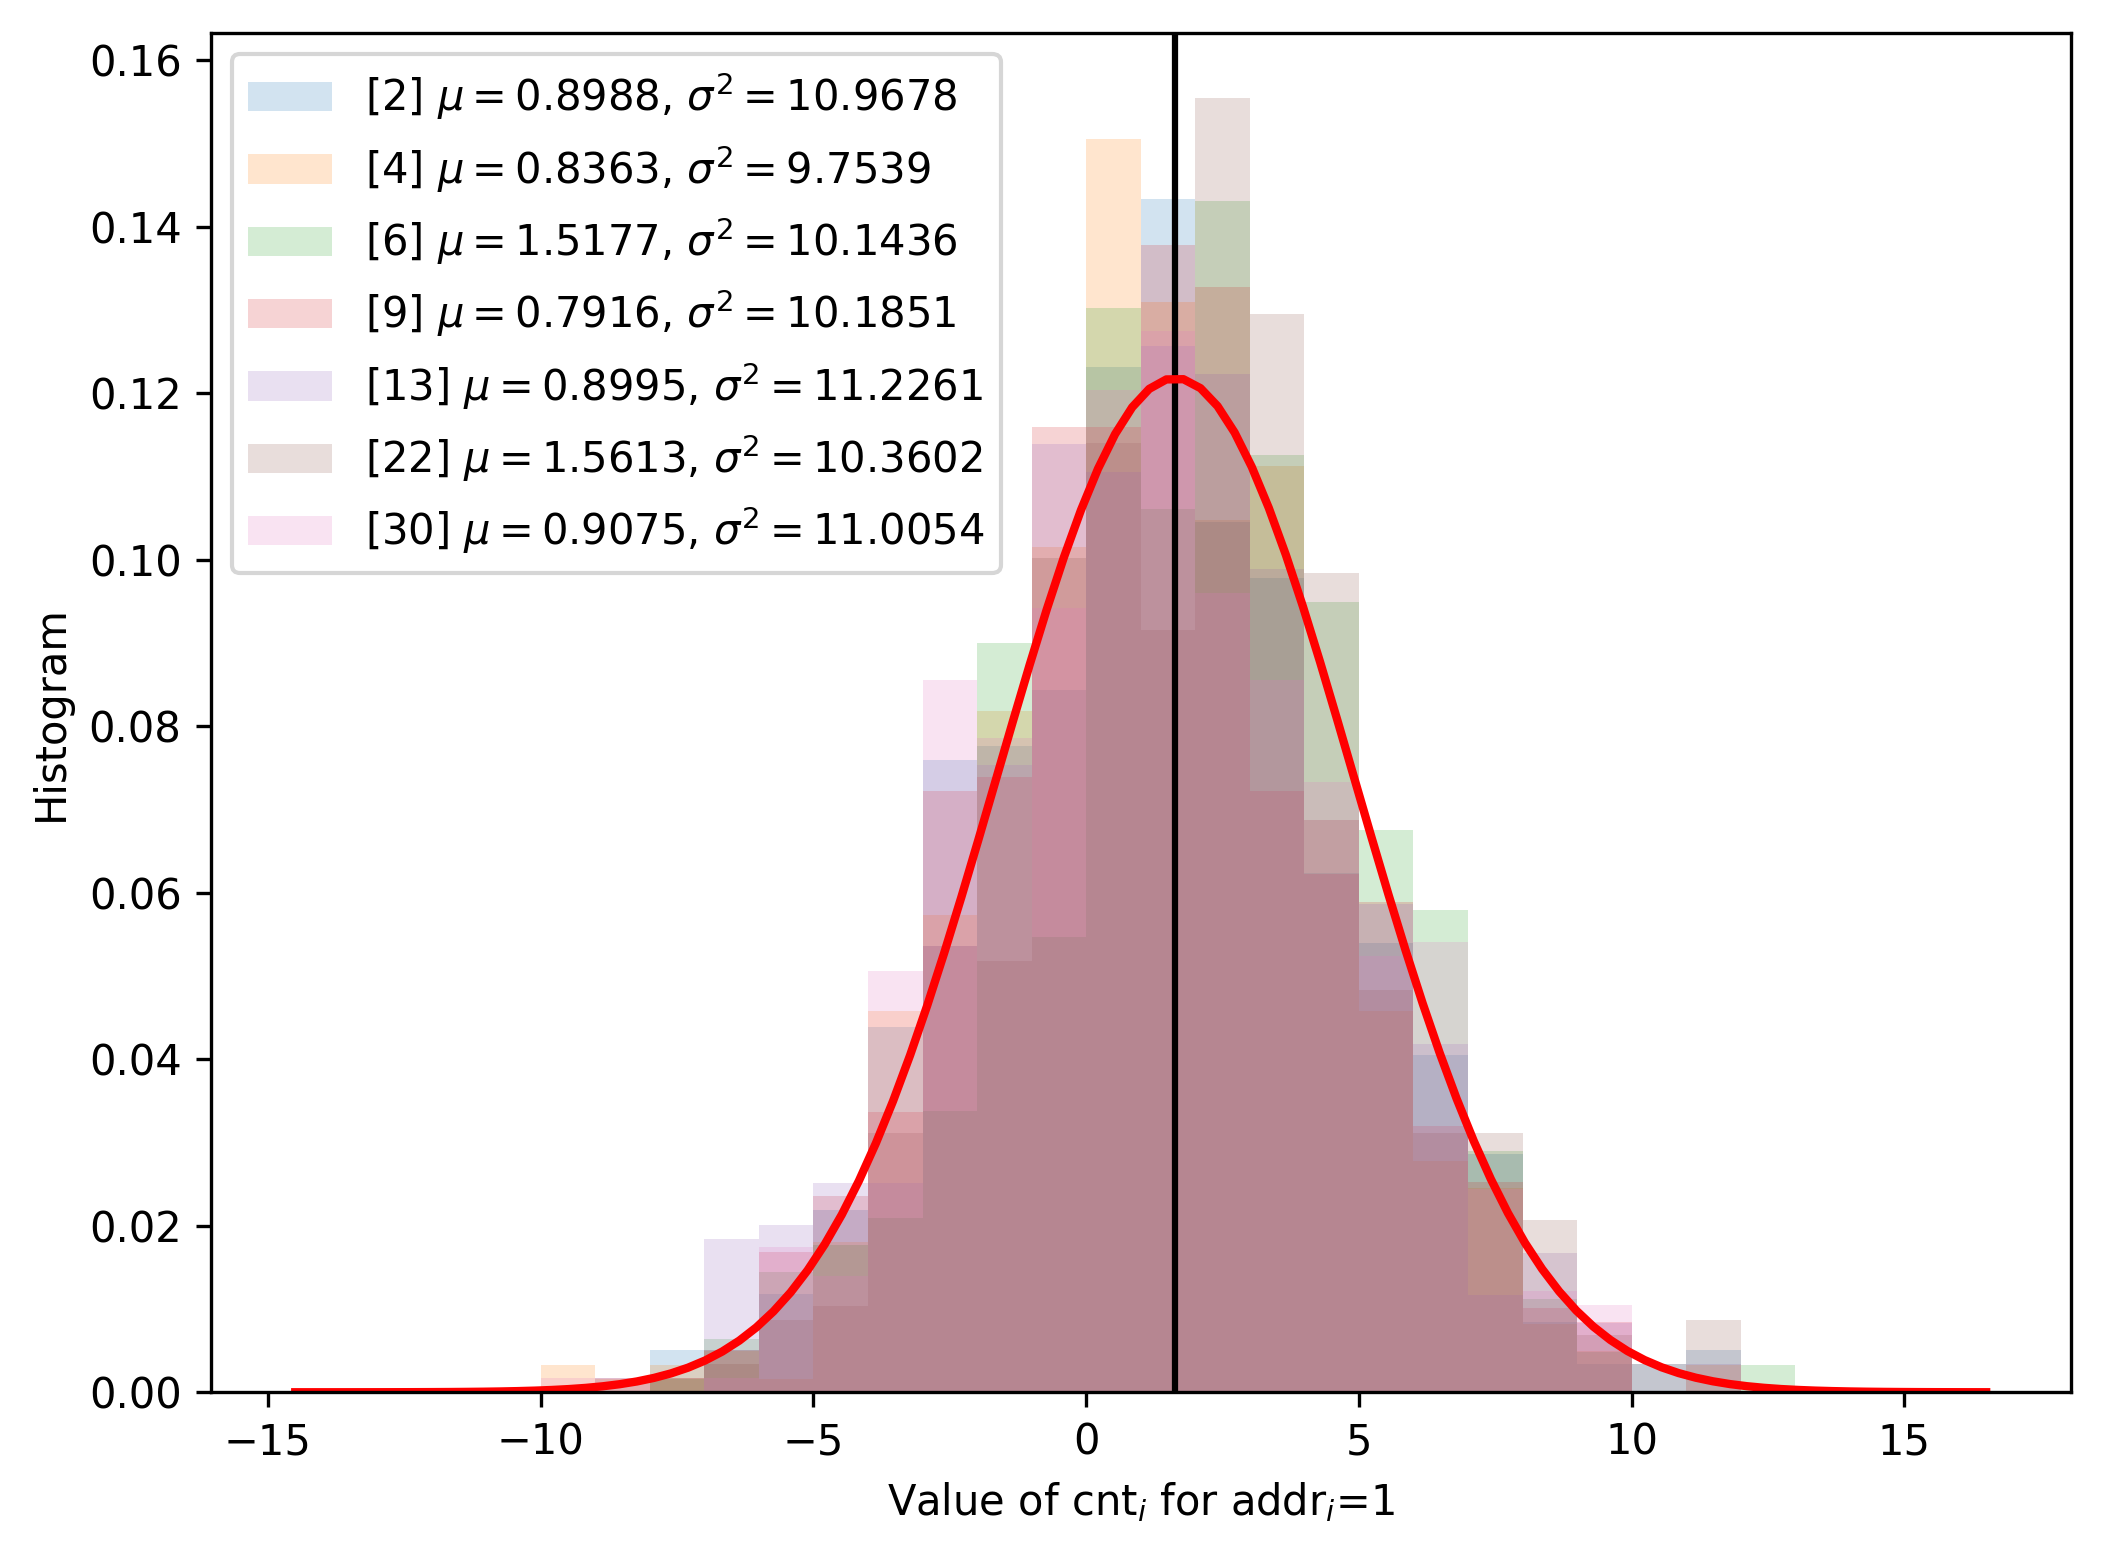

In [53]:
plt.figure(figsize=(8, 6), dpi=300)

lo = mu1 - 3*((var1/len(v5_2))**0.5)
hi = mu1 + 3*((var1/len(v5_2))**0.5)

#print(len(v5_2[3]))
max_items = 7
cnt = 0
for i, v in enumerate(v5_2):
    mu = 1.0*sum(v)/len(v)
    if lo < mu < hi:
        continue
    cnt += 1
    if max_items == 0:
        continue
    var = sum((x-mu)**2 for x in v)/len(v)
    bins = plt.hist(v, bins=range(min(v), max(v)+1), density=True, alpha=0.2, label='[{}] $\mu = {:.4f}$, $\sigma^2 = {:.4f}$'.format(i, mu, var));
    max_items -= 1
    #print(mu)
    #print((2*prob_xi_yi-1) * 10000 * 1071.85 / 1000000)

print('cnt', cnt)
    
plt.axvline(mu1+0.5, color='k')
plt.xlabel('Value of cnt$_i$ for addr$_i$=1')
plt.ylabel('Histogram')

import numpy as np
import matplotlib.mlab as mlab
from scipy import stats
x_values = np.linspace(-15, 16, 100)
y_values = mlab.normpdf(x_values, mu1, var1**0.5)
plt.plot([x+0.5 for x in x_values], y_values, 'r', linewidth=2.0);

print(mu1, var1)

plt.legend();

In [54]:
for i in range(len(v5)):
    assert sum(v5_2[i]) == v5[i]
print('Ok!')

Ok!


0.998278829604 580 581
0.0464716006885


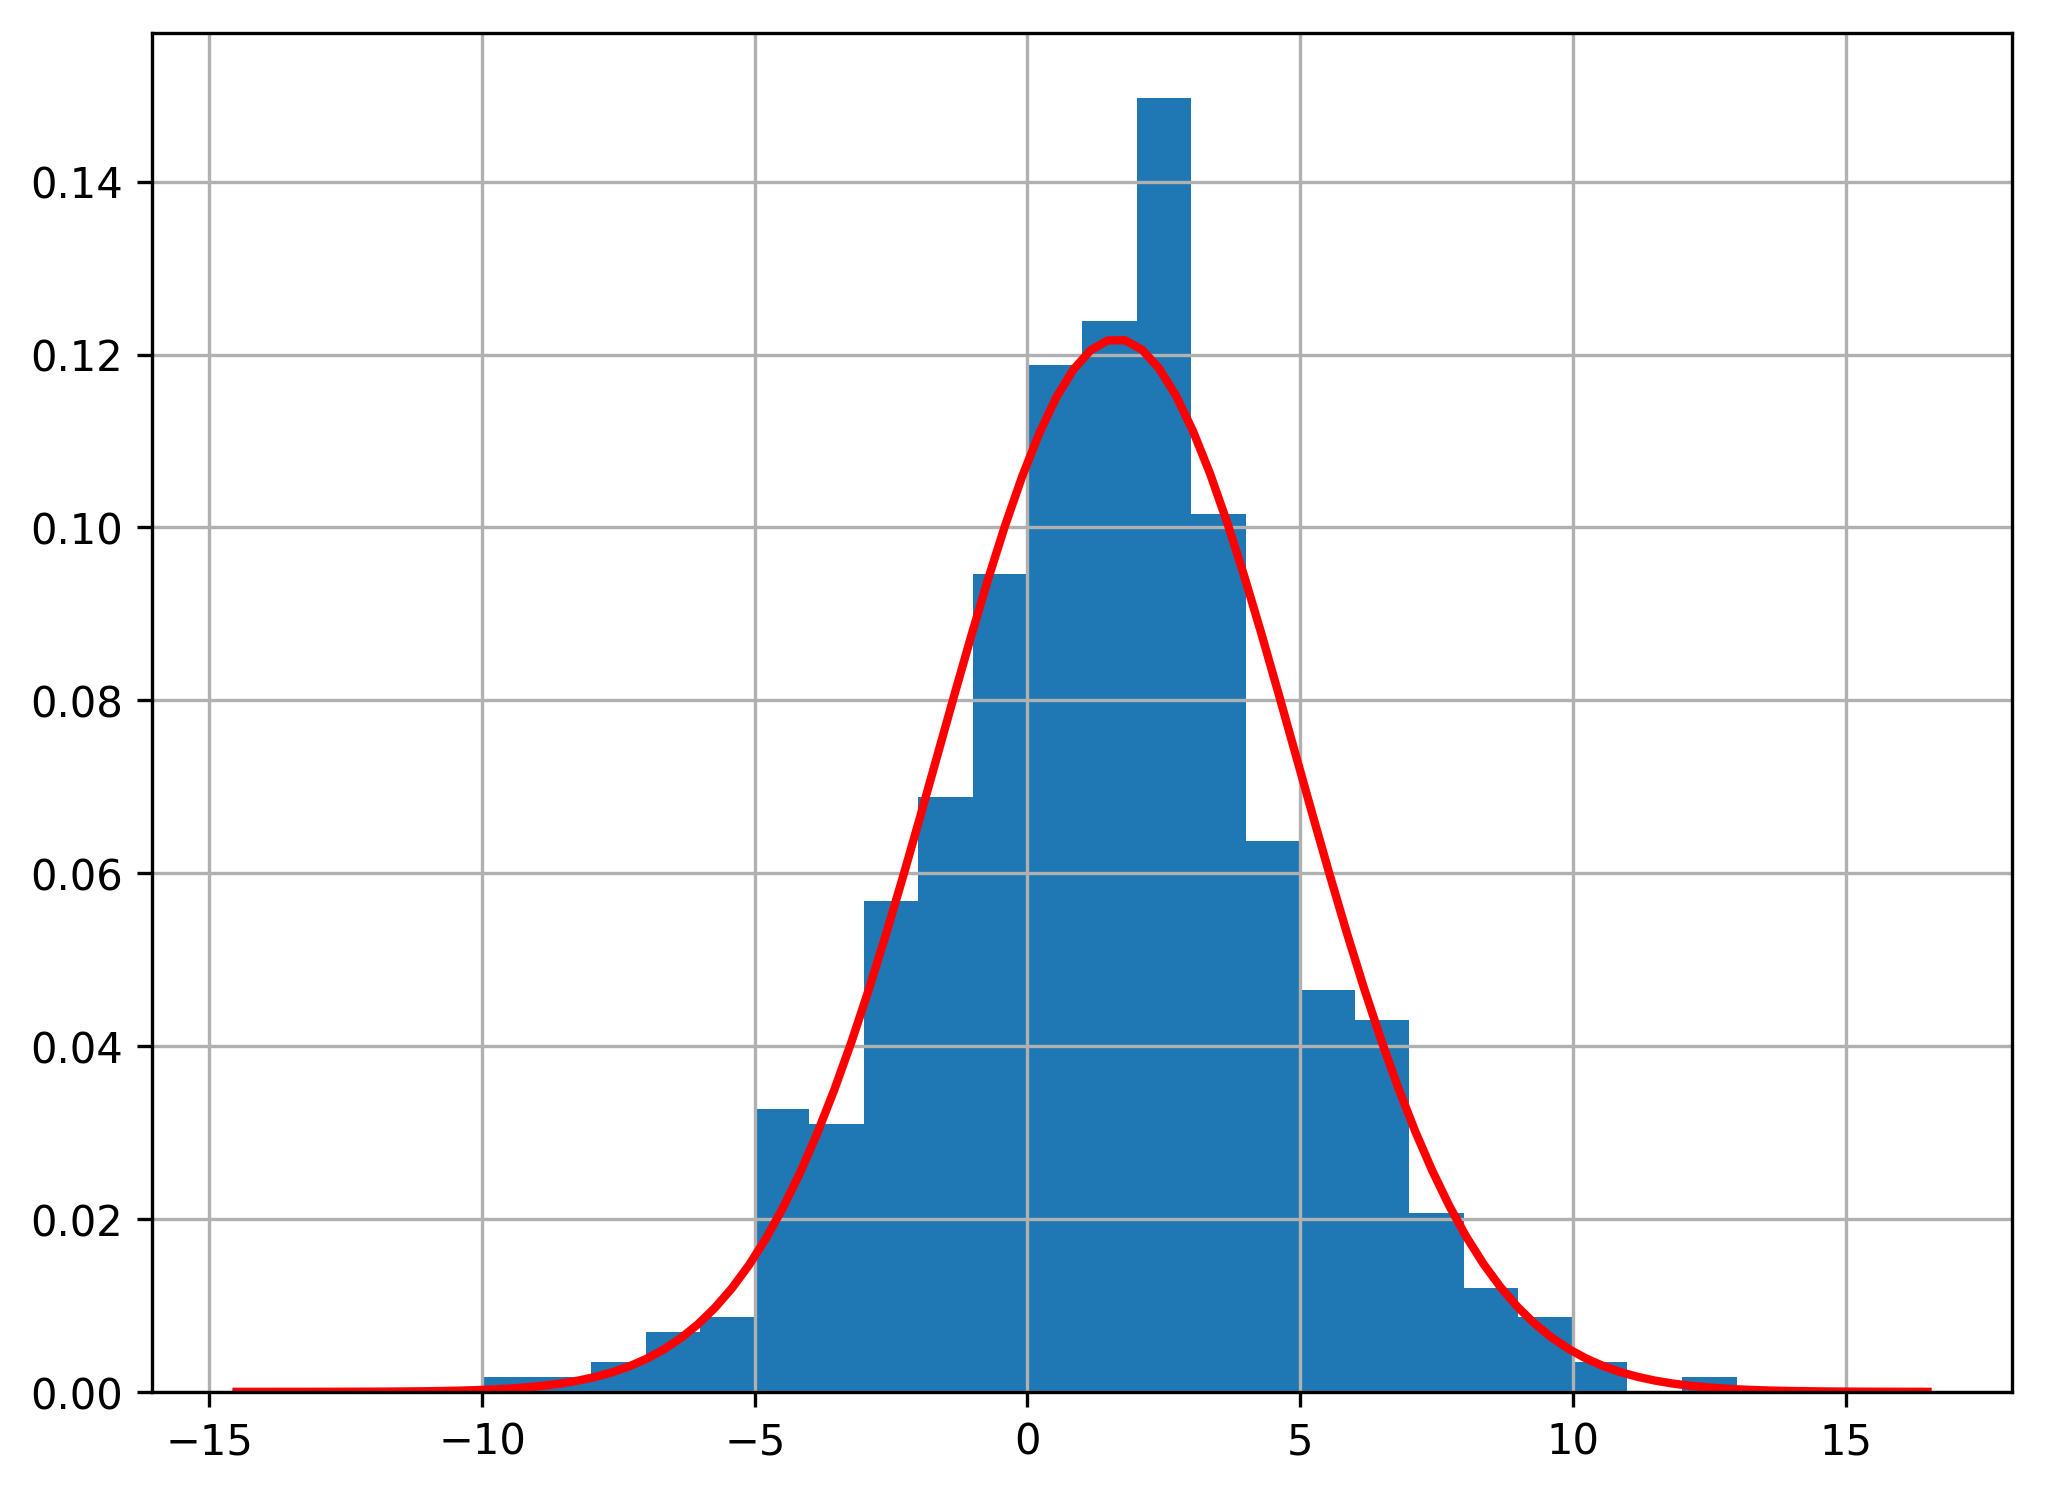

In [55]:
plt.figure(figsize=(8, 6), dpi=300)

idx = 37
v = v5_2[idx]
print(1.0*sum(v)/len(v), sum(v), len(v))
plt.hist(v, bins=range(min(v), max(v)+1), density=True);

x_values = np.linspace(-15, 16, 100)
y_values = mlab.normpdf(x_values, mu1, var1**0.5)
plt.plot([x+0.5 for x in x_values], y_values, 'r', linewidth=2.0);
plt.grid()

#v.sort()
#print(v)
print(1.0*v.count(5)/len(v))

669.39 11804.0069
AQUI
672.1245773529298 6438.803437867926


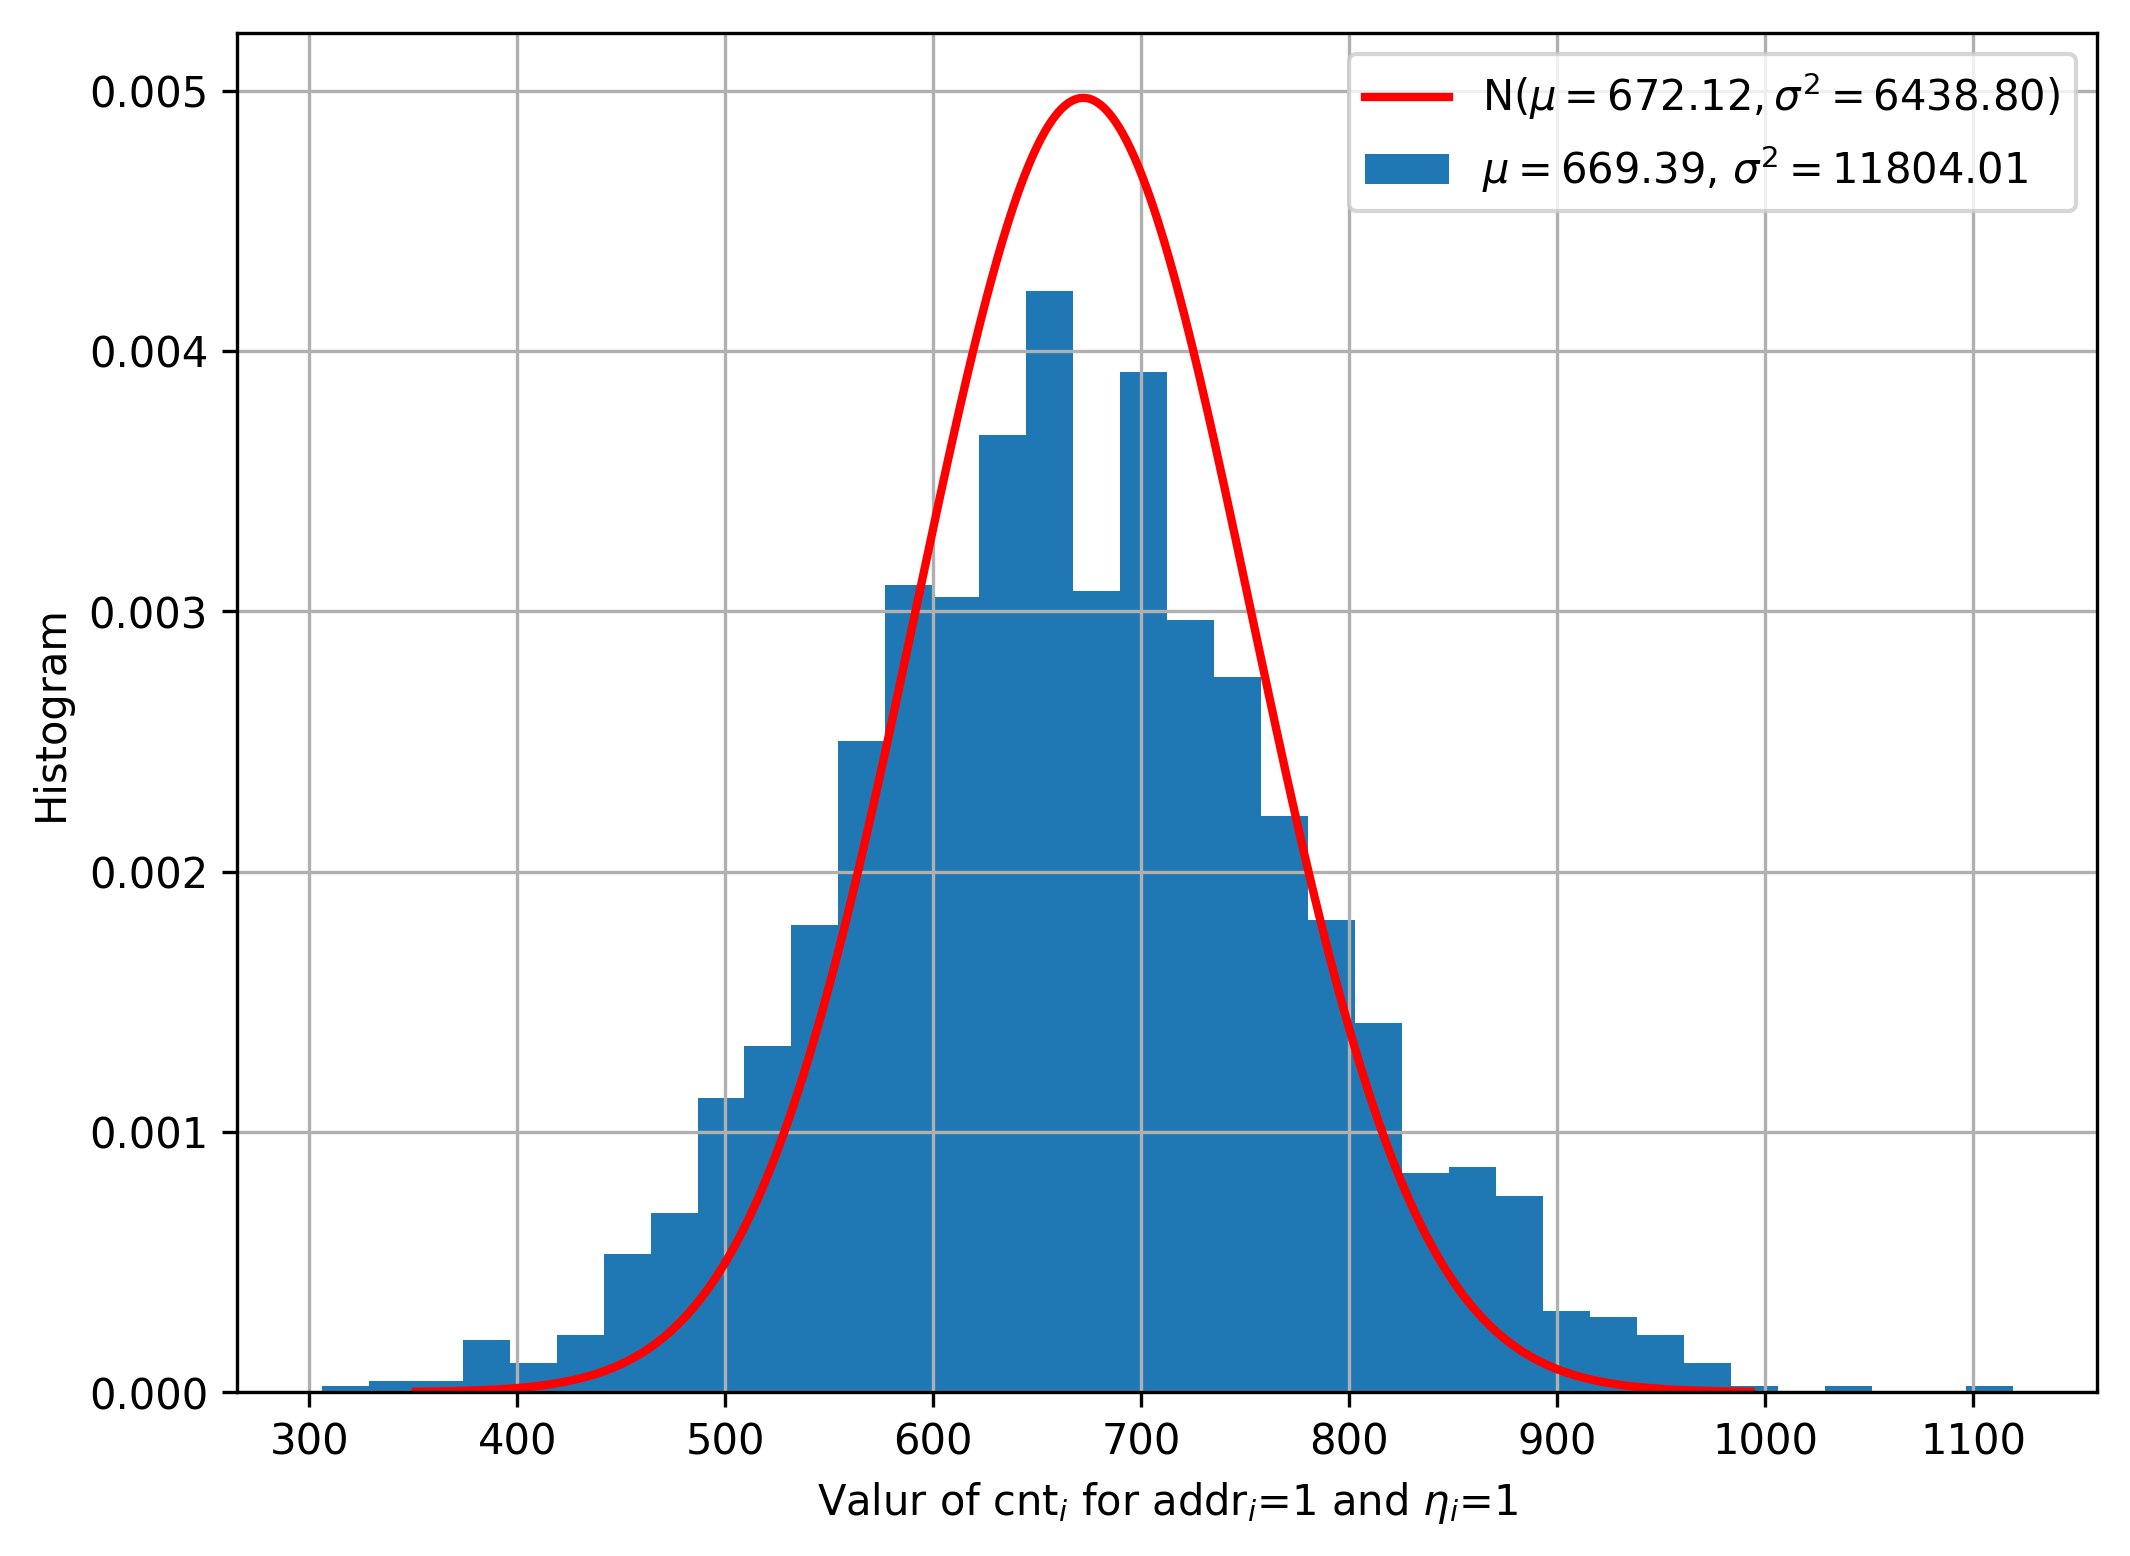

In [56]:
plt.figure(figsize=(8, 6), dpi=300)

mu = 1.0*sum(v5)/len(v5)
var = sum((x-mu)**2 for x in v5)/len(v5)
bins = plt.hist(v5, bins='fd', density=True, label='$\mu = {:.2f}$, $\sigma^2 = {:.2f}$'.format(mu, var));
print(mu, var)

plt.ylabel('Histogram')

if (mu > 0):
    # eta_i = 1, addr_i = 1
    print('AQUI')
    mu2 = mu1 * p*h
    var2 = var1 * p * h + mu1*mu1*(h*p*(p-1) + p*p*h*(1-p1))
    plt.xlabel('Valur of cnt$_i$ for addr$_i$=1 and $\eta_i$=1')

else:
    # eta_i = 1, addr_i = 0
    mu2 = -mu1 * (1-p) * h
    var2 = var1 * (1-p) * h + mu1 * (h*p*(p-1) + (1-p)*(1-p)*H*p1*(1-p1))
    plt.xlabel('Valur of cnt$_i$ for addr$_i$=0 and $\eta_i$=1')


import numpy as np
import matplotlib.mlab as mlab
x_values = np.linspace(mu2-4*(var2**0.5), mu2+4*(var2**0.5), 1000)
y_values = mlab.normpdf(x_values, mu2, var2**0.5)
plt.plot(x_values, y_values, 'r', linewidth=2.0, label='N($\mu={:.2f}, \sigma^2={:.2f}$)'.format(mu2, var2));

plt.grid()
print(mu2, var2)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
# bins=range(min(v6), max(v6)+1)
plt.hist(v6, bins='fd', density=True);
mu = 1.0*sum(v6)/len(v6)
var = sum((x-mu)**2 for x in v6)/len(v6)
print(mu, var**0.5)

mu = h*p
sigma = h*p*(1-p) + p*p*H*p1*(1-p1)
sigma = sigma**0.5

print('theory', mu, sigma)

x_values = np.linspace(min(v6), max(v6)+1, 1000)
y_values = mlab.normpdf(x_values, mu, sigma)
plt.plot(x_values, y_values, 'r', linewidth=2.0);

plt.xlabel('Number of activated hard locations with the same bit as the reading address')
plt.ylabel('Histogram')

In [60]:
v7 = []
v8 = []
k = 0
while k < 4000:
    bs1 = sdmlib.Bitstring.init_random(bits)
    bit_idx = random.randint(0, bits-1)
    if bs1.get_bit(bit_idx) != 0:
        continue
    k += 1
    selected = address_space.scan_opencl2(bs1, radius)
    acc = 0
    cnt = 0
    for idx in selected:
        #bs2 = address_space.get_bitstring(idx)
        acc += counter.counter[idx][bit_idx]
    v7.append(acc)
    v8.append(1.0*cnt/len(selected))

-128.8165 29298.6653277
-128.626268665563 11515.021921381147


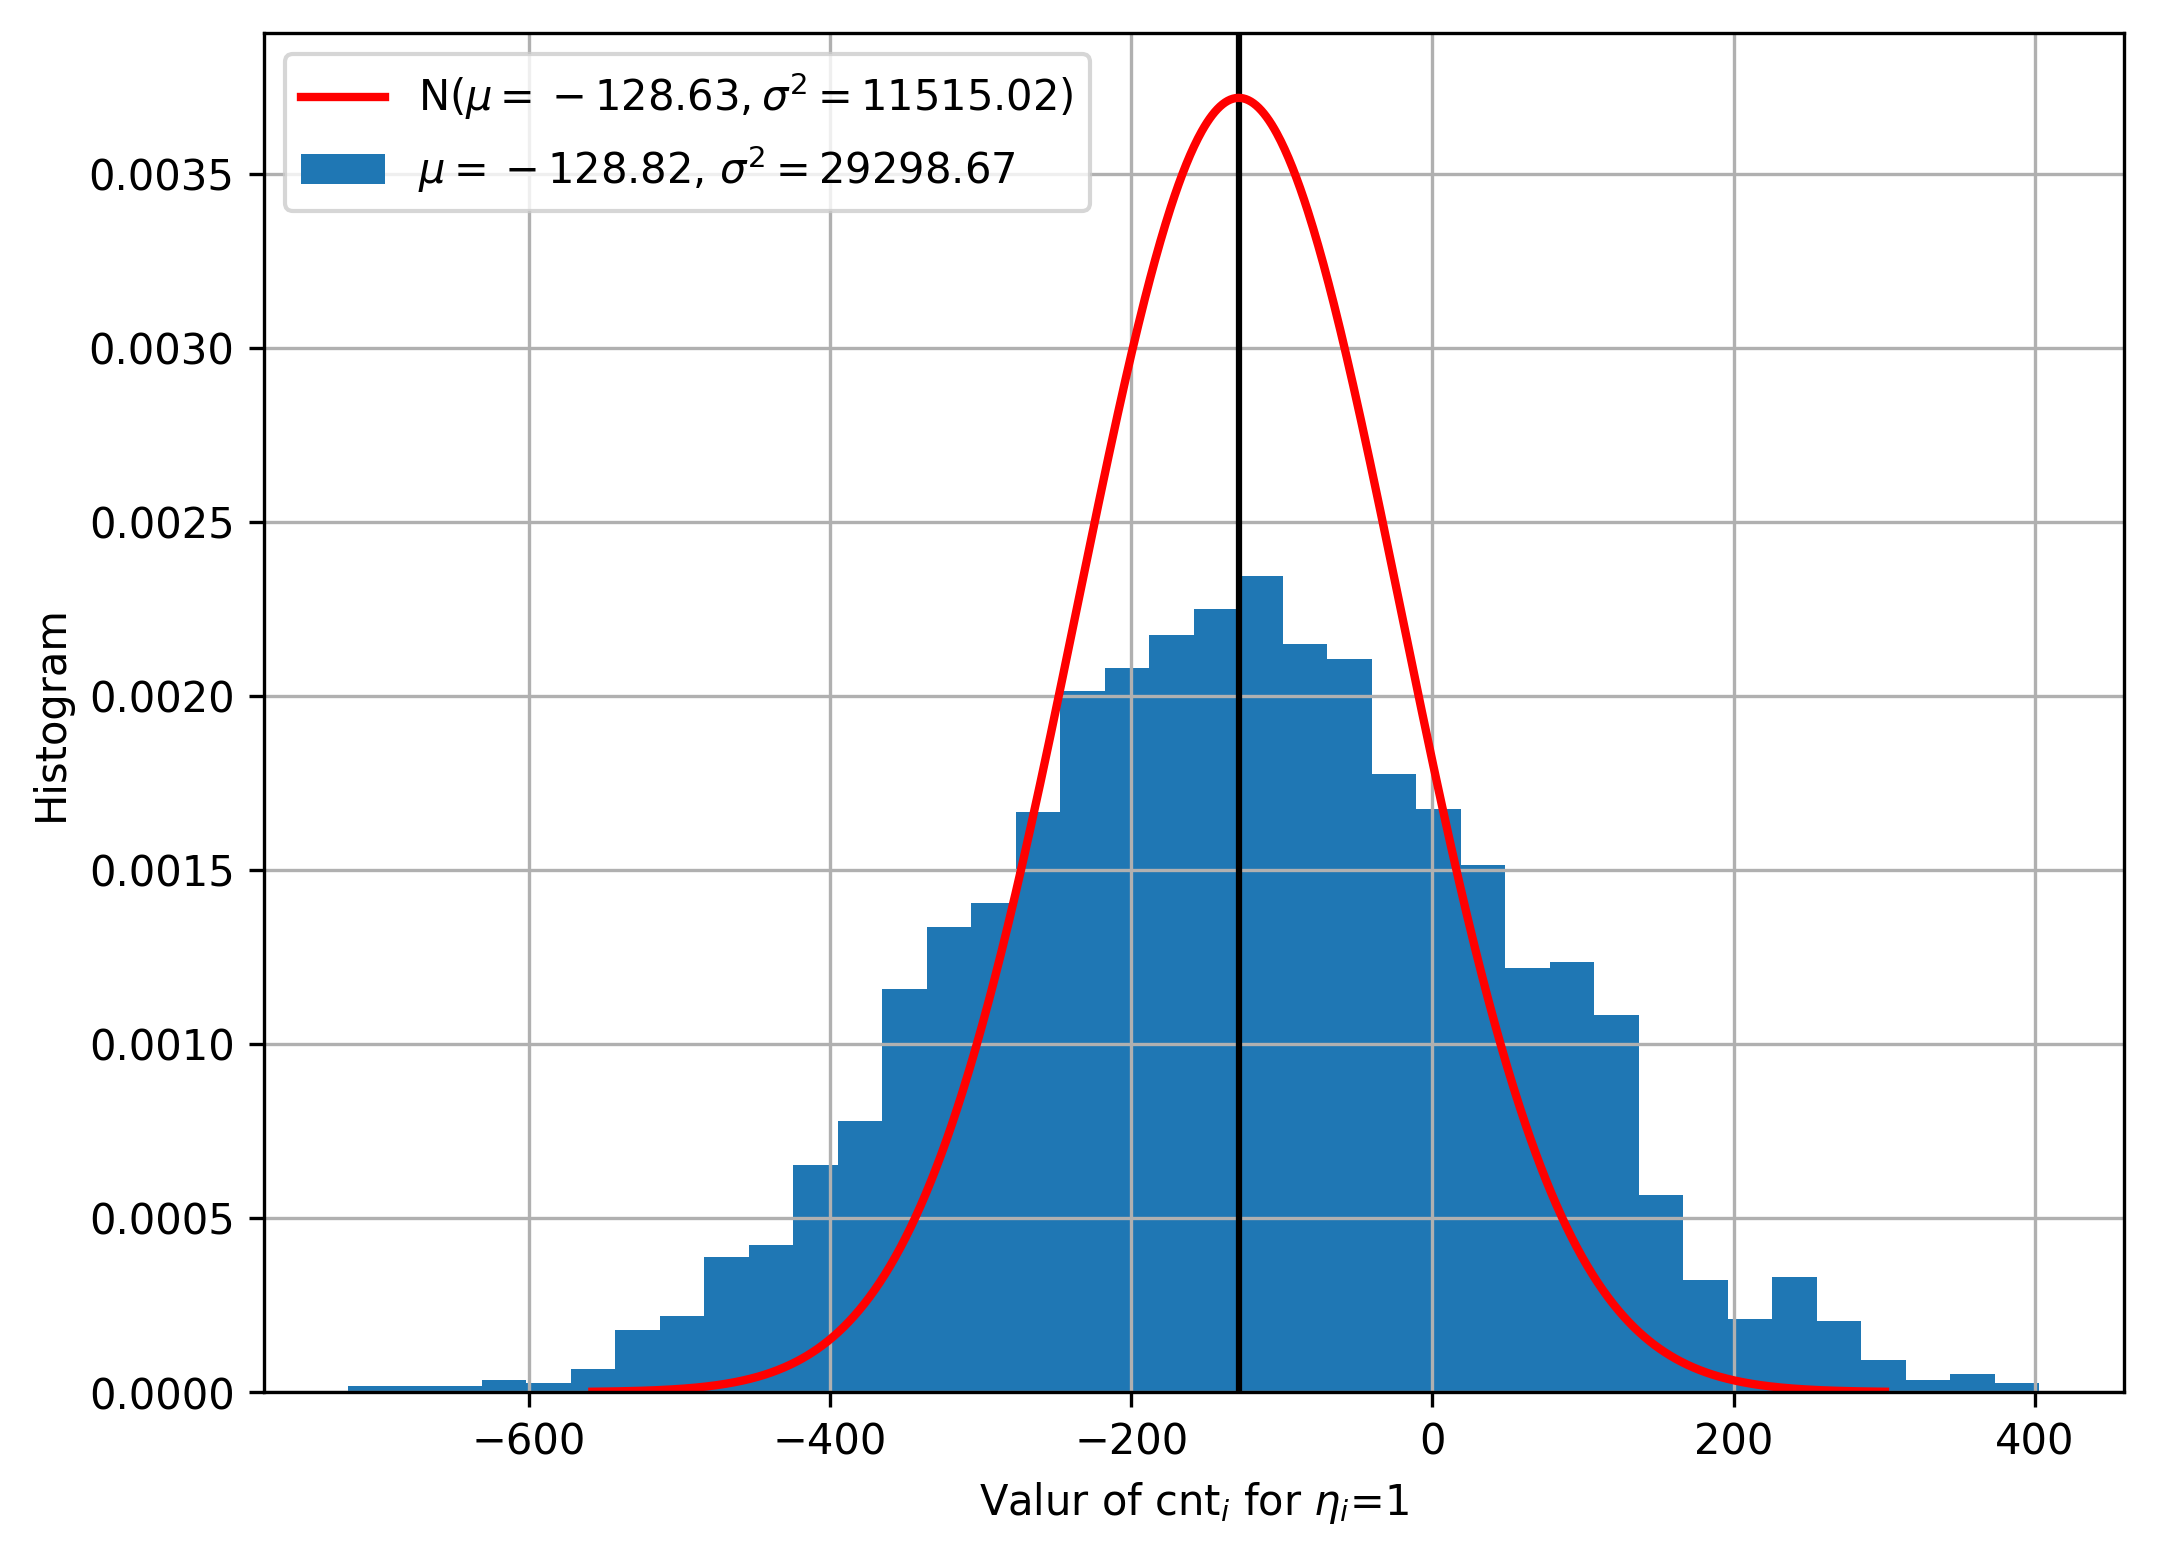

In [62]:
plt.figure(figsize=(8, 6), dpi=300)

mu = 1.0*sum(v7)/len(v7)
var = sum((x-mu)**2 for x in v7)/len(v7)
#bins = range(min(v7), max(v7)+1)
bins = plt.hist(v7, bins='fd', density=True, label='$\mu = {:.2f}$, $\sigma^2 = {:.2f}$'.format(mu, var));
print(mu, var)

plt.axvline(mu+0.5, color='k')
plt.ylabel('Histogram')

mu3 = -(2*p-1) * (2*p-1) * theta * h
var3 = (var1 * p * h + mu1*mu1*(h*p*(p-1) + p*p*h*(1-p1))) + (var1 * (1-p) * h + mu1*mu1*(h*p*(p-1) + (1-p)*(1-p)*h*(1-p1)))
#var3 = 2.4*var3
#var3 = 27838.3029124
plt.xlabel('Valur of cnt$_i$ for $\eta_i$=1')

import numpy as np
import matplotlib.mlab as mlab
x_values = np.linspace(mu3-4*(var3**0.5), mu3+4*(var3**0.5), 1000)
y_values = mlab.normpdf(x_values, mu3, var3**0.5)
plt.plot(x_values, y_values, 'r', linewidth=2.0, label='N($\mu={:.2f}, \sigma^2={:.2f}$)'.format(mu3, var3));

print(mu3, var3)
plt.grid()
plt.legend()

In [ ]:
p
#sum(x for x, y in zip(bins[0], bins[1]) if y < 0)

In [25]:
v9 = []
for i in range(2000):
    bs1 = sdmlib.Bitstring.init_random(bits)
    bs2 = sdm.read(bs1)
    v9.append(bs1.distance_to(bs2))

221 164
220.377712199 171.811376165


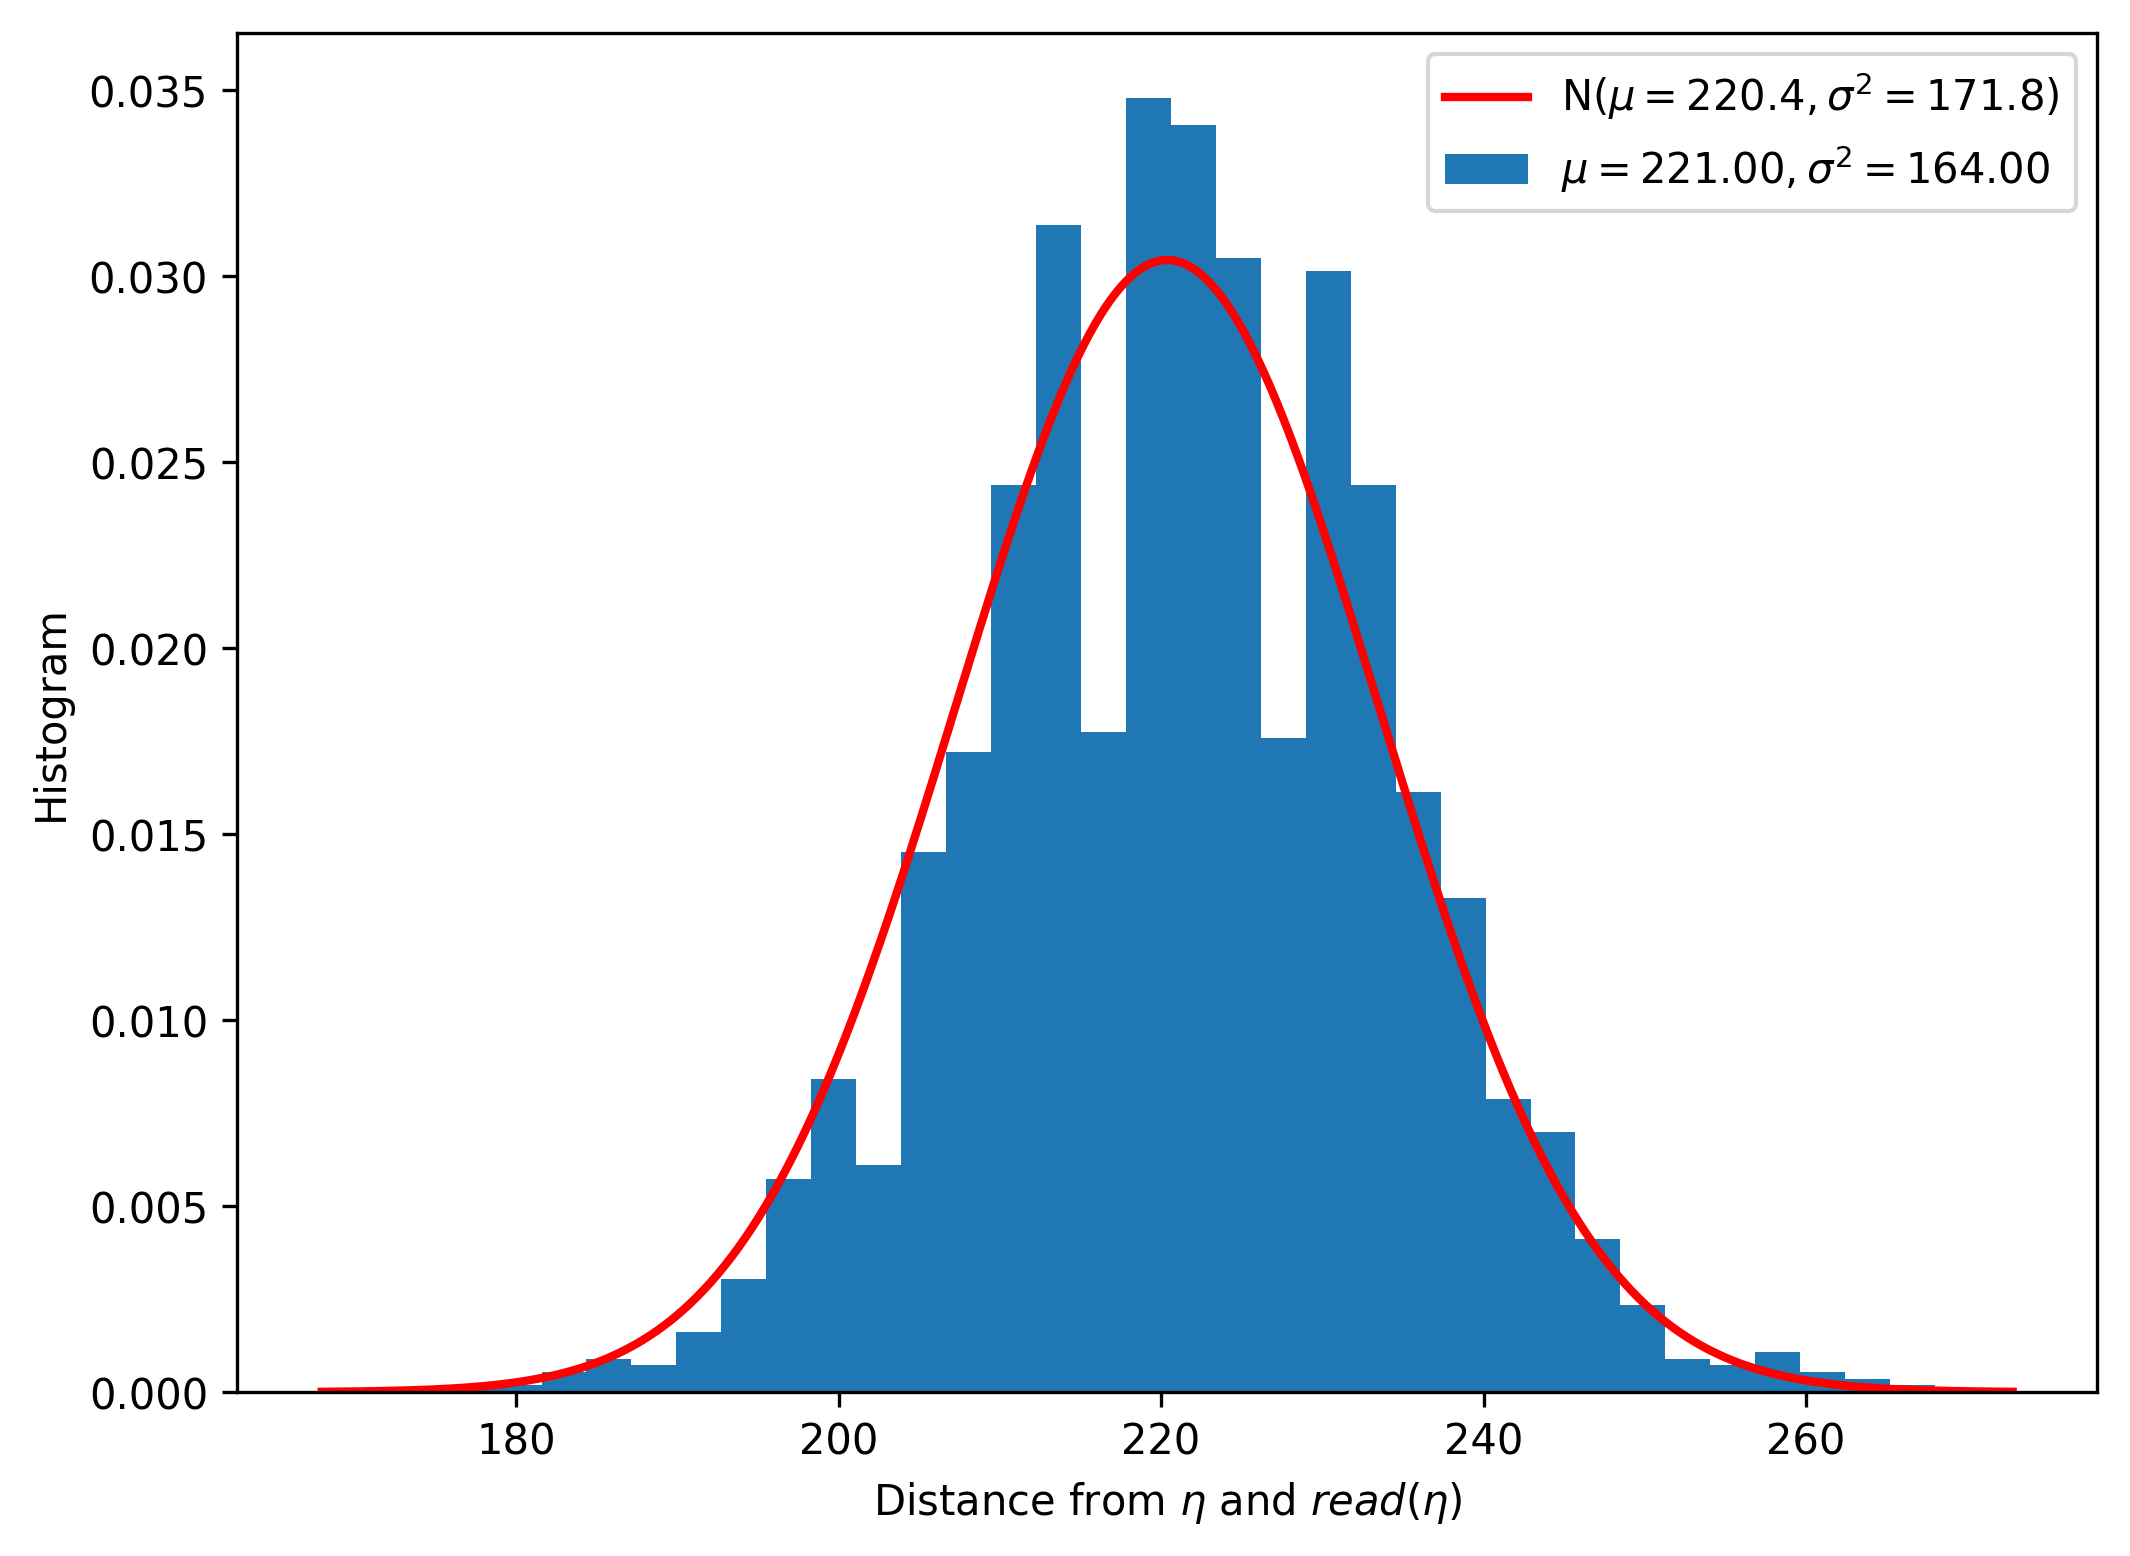

In [34]:
plt.figure(figsize=(8, 6), dpi=300)
mu = sum(v9)/len(v9)
var = sum((x-mu)**2 for x in v9)/len(v9)
plt.hist(v9, bins='fd', density=True, label='$\mu={:.2f}, \sigma^2={:.2f}$'.format(mu, var));
print(mu, var)

plt.xlabel('Distance from $\eta$ and $read(\eta)$')
plt.ylabel('Histogram')

tmp_p = 0.22037771219874325
#p = 0.1137518032308093
#p = 0.1993037279155528
mu = 1000*tmp_p
sigma = (1000*tmp_p*(1-tmp_p))**0.5

print(mu, sigma**2)

x_values = np.linspace(mu-4*sigma, mu+4*sigma, 1000)
y_values = mlab.normpdf(x_values, mu, sigma)
plt.plot(x_values, y_values, 'r', linewidth=2.0, label='N$(\mu={:.1f}, \sigma^2={:.1f})$'.format(mu, sigma**2));

plt.legend();

In [ ]:
print('oi')